# Figure 7.6

The PI to PD effective radiative forcing bar chart

## AR4 barchart
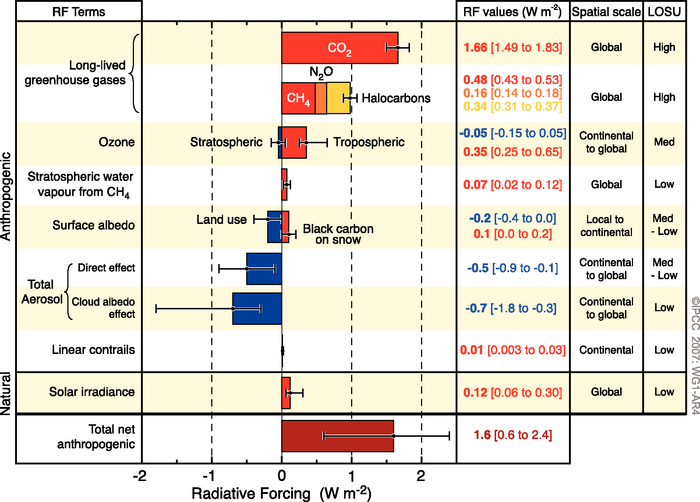

## AR5 barchart
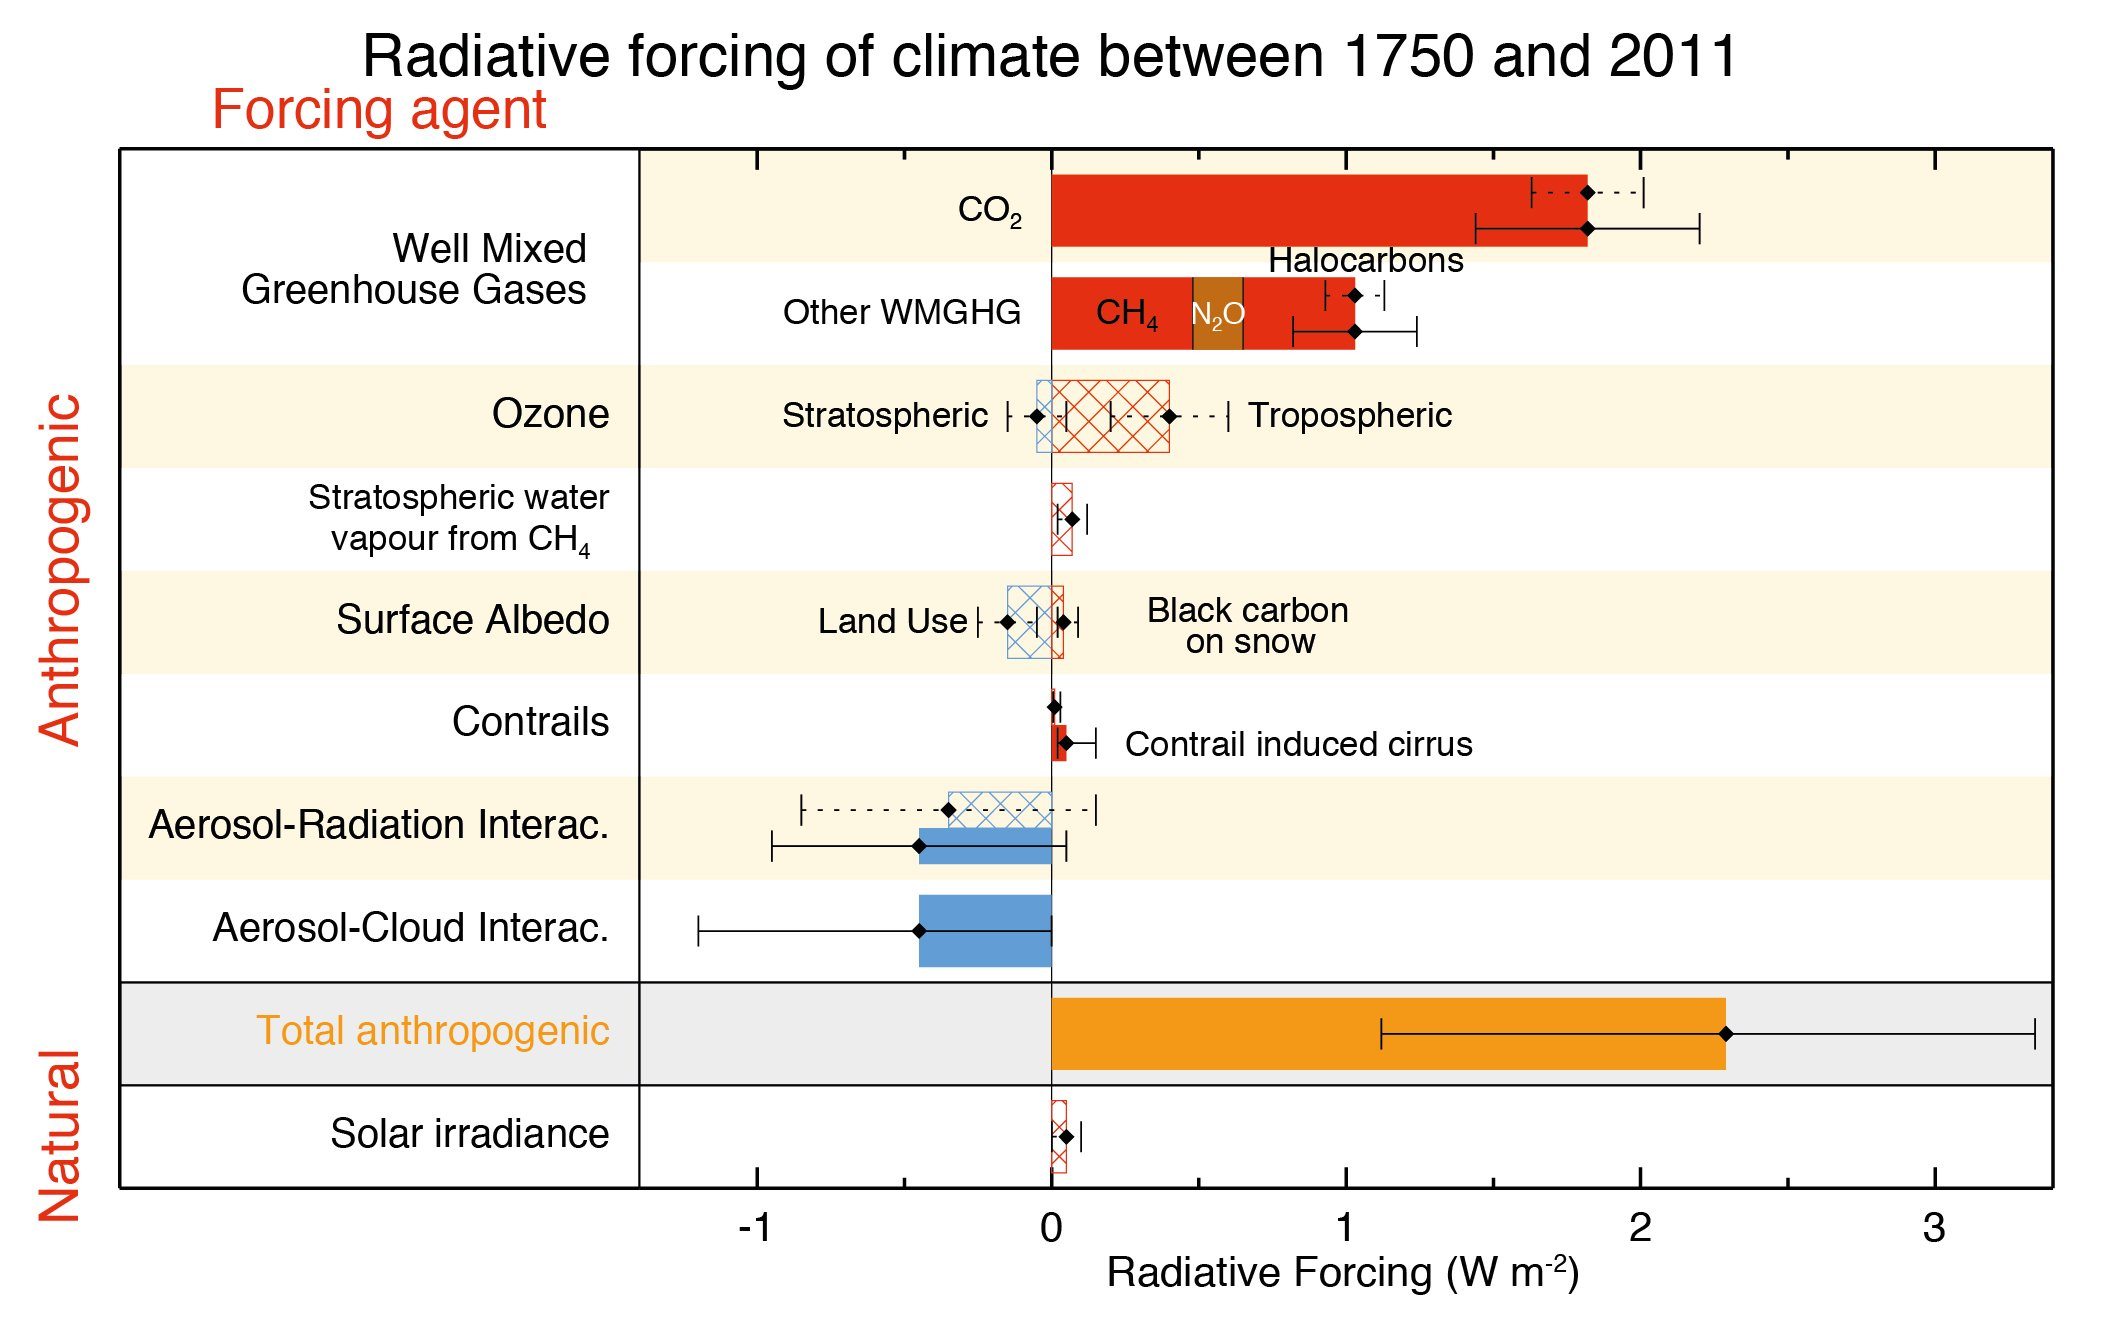

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from netCDF4 import Dataset
import warnings

In [2]:
pl.rcParams['figure.figsize'] = (18/2.54, 10/2.54)
pl.rcParams['font.size'] = 11
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = True
pl.rcParams['ytick.major.size'] = 0
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [3]:
AR6_forcing = pd.read_csv('../data_output/AR6_ERF_1750-2019.csv', index_col=0)
AR6_forcing_p05 = pd.read_csv('../data_output/AR6_ERF_1750-2019_pc05.csv', index_col=0)
AR6_forcing_p95 = pd.read_csv('../data_output/AR6_ERF_1750-2019_pc95.csv', index_col=0)

In [4]:
target_year = 2019
aerosol_years = slice(2005,2014)    # for some reason pandas slices do include end year
AR6_forcing.loc[target_year,:]

co2                               2.156278
ch4                               0.543983
n2o                               0.208463
other_wmghg                       0.408014
o3                                0.474467
h2o_stratospheric                 0.050000
contrails                         0.057535
aerosol-radiation_interactions   -0.215562
aerosol-cloud_interactions       -0.842778
bc_on_snow                        0.080000
land_use                         -0.200000
volcanic                          0.139917
solar                            -0.022173
nonco2_wmghg                      1.160459
aerosol                          -1.058340
chapter2_other_anthro            -0.012465
total_anthropogenic               2.720399
total_natural                     0.117744
total                             2.838143
Name: 2019, dtype: float64

In [5]:
unc = {}
for agent in ['co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric', 'contrails',
             'aerosol', 'bc_on_snow', 'land_use', 'volcanic', 'solar', 'total_anthropogenic', 'nonco2_wmghg', 'o3']:
    unc[agent] = np.array([
        AR6_forcing.loc[target_year,agent]-AR6_forcing_p05.loc[target_year,agent],
        AR6_forcing_p95.loc[target_year,agent]-AR6_forcing.loc[target_year,agent]]).reshape((2,1))
# unc['aerosol'] = np.array([
#     AR6_forcing.loc[aerosol_years,'aerosol'].mean()-AR6_forcing_p05.loc[aerosol_years,'aerosol'].mean(),
#     AR6_forcing_p95.loc[aerosol_years,'aerosol'].mean()-AR6_forcing.loc[aerosol_years,'aerosol'].mean()]).reshape((2,1))

In [6]:
unc['nonco2_wmghg']

array([[0.13695595],
       [0.13620761]])

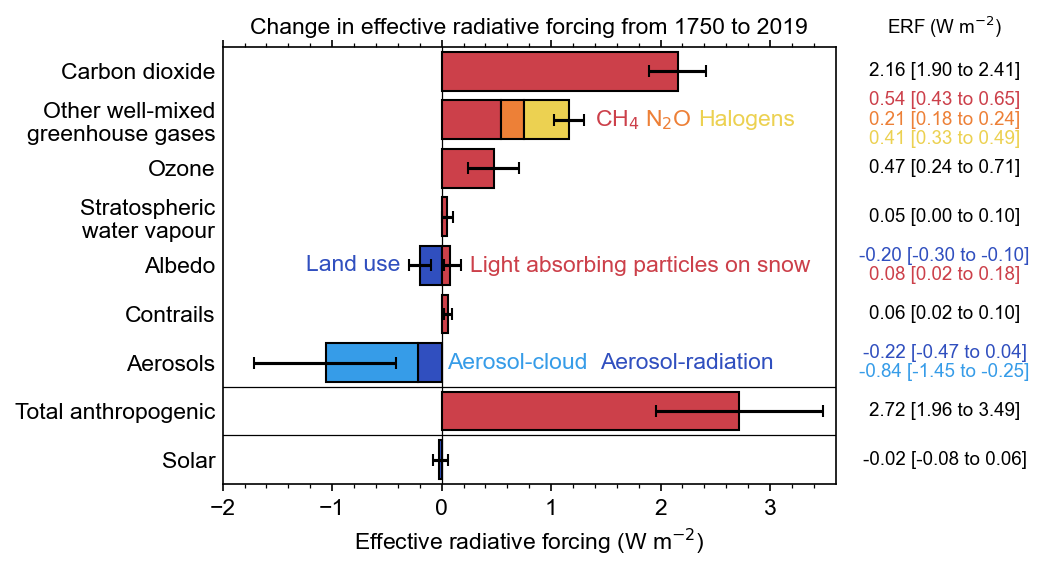

In [7]:
gs = gridspec.GridSpec(1,2, width_ratios=[5,1])
ax = pl.subplot(gs[0,0])

#hot = ['#de2d26','#fc9274','#fee0d2']
hot = ['#cc404a','#ed8037','#ecd151']
cool=['#304fbf','#369ce8']

ax.barh(0, AR6_forcing.loc[target_year,'co2'], color=hot[0], xerr=unc['co2'], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-1, AR6_forcing.loc[target_year,'ch4'], color=hot[0], lw=1, edgecolor='k', zorder=3)
ax.barh(-1, AR6_forcing.loc[target_year,'n2o'], color=hot[1], left=AR6_forcing.loc[target_year,'ch4'], lw=1, edgecolor='k', zorder=3)
ax.barh(-1, AR6_forcing.loc[target_year,'other_wmghg'], color=hot[2], left=AR6_forcing.loc[target_year,'ch4']+AR6_forcing.loc[target_year,'n2o'], xerr=unc['nonco2_wmghg'], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-2, AR6_forcing.loc[target_year,'o3'], xerr=unc['o3'], color=hot[0], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-3, AR6_forcing.loc[target_year,'h2o_stratospheric'], color=hot[0], xerr=unc['h2o_stratospheric'], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-4, AR6_forcing.loc[target_year,'land_use'], color=cool[0], xerr=unc['land_use'], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-4, AR6_forcing.loc[target_year,'bc_on_snow'], color=hot[0], xerr=unc['bc_on_snow'], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-5, AR6_forcing.loc[target_year,'contrails'], color=hot[0], xerr=unc['contrails'], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-6, AR6_forcing.loc[target_year,'aerosol-radiation_interactions'], color=cool[0], lw=1, edgecolor='k', zorder=3)
ax.barh(-6, AR6_forcing.loc[target_year,'aerosol-cloud_interactions'], color=cool[1], left=AR6_forcing.loc[target_year,'aerosol-radiation_interactions'], xerr=unc['aerosol'], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-7, AR6_forcing.loc[target_year,'total_anthropogenic'], color=hot[0], xerr=unc['total_anthropogenic'], capsize=3, lw=1, edgecolor='k', zorder=3)
ax.barh(-8, AR6_forcing.loc[target_year,'solar'], color=cool[0], xerr=unc['solar'], capsize=3, lw=1, edgecolor='k', zorder=3)

ax.text(1.6, -1, 'CH$_4$',ha='center',va='center', color=hot[0])
ax.text(2.07, -1,'N$_2$O',ha='center',va='center', color=hot[1], bbox=dict(facecolor='w', boxstyle='square,pad=0.0', lw=0))
#ax.text(2.4, -1, 'Halogens', va='center', color='k', bbox=dict(facecolor=hot[2], boxstyle='square,pad=0.2', lw=1))
ax.text(2.34, -1, 'Halogens', va='center', color=hot[2], bbox=dict(facecolor='w', boxstyle='square,pad=0.0', lw=0))
ax.text(-0.38,-4, 'Land use', va='center', ha='right', color=cool[0], bbox=dict(facecolor='w', boxstyle='square,pad=0.0', lw=0))
ax.text(0.26, -4, 'Light absorbing particles on snow', va='center', ha='left', color=hot[0], bbox=dict(facecolor='w', boxstyle='square,pad=0.0', lw=0))
ax.text(0.05, -6, 'Aerosol-cloud', va='center', ha='left', color=cool[1], bbox=dict(facecolor='w', boxstyle='square,pad=0.0', lw=0))
ax.text(1.45, -6, 'Aerosol-radiation', va='center', ha='left', color=cool[0], bbox=dict(facecolor='w', boxstyle='square,pad=0.0', lw=0))

ax.set_ylim(-8.5,0.5)
ax.set_xlim(-2.,3.6)
ax.axvline(0, color='k', lw=0.6)
ax.axhline(-6.5, color='k', lw=0.6)
ax.axhline(-7.5, color='k', lw=0.6)
ax.set_yticks(np.arange(-8,1));
ax.set_xticks(np.arange(-2,3.2,1));
ax.set_xlabel('Effective radiative forcing (W m$^{-2}$)')
ax.set_title('')
ax.set_yticklabels(['Carbon dioxide','Other well-mixed\ngreenhouse gases','Ozone','Stratospheric\nwater vapour', 'Albedo', 'Contrails', 'Aerosols','Total anthropogenic', 'Solar'][::-1]);
ax.set_title('Change in effective radiative forcing from 1750 to %d' % target_year, size=11)


# values
ax_values = pl.subplot(gs[0,1])
ax_values.text(0.5,0,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'co2'], AR6_forcing_p05.loc[target_year,'co2'], AR6_forcing_p95.loc[target_year,'co2']), ha='center', va='center', size=9)
ax_values.text(0.5,-0.6,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'ch4'], AR6_forcing_p05.loc[target_year,'ch4'], AR6_forcing_p95.loc[target_year,'ch4']), ha='center', va='center', size=9, color=hot[0])
ax_values.text(0.5,-1.0,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'n2o'], AR6_forcing_p05.loc[target_year,'n2o'], AR6_forcing_p95.loc[target_year,'n2o']), ha='center', va='center', size=9, color=hot[1])
ax_values.text(0.5,-1.4,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'other_wmghg'], AR6_forcing_p05.loc[target_year,'other_wmghg'], AR6_forcing_p95.loc[target_year,'other_wmghg']), ha='center', va='center', size=9, color=hot[2])
ax_values.text(0.5,-2,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'o3'], AR6_forcing_p05.loc[target_year,'o3'], AR6_forcing_p95.loc[target_year,'o3']), ha='center', va='center', size=9)
ax_values.text(0.5,-3,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'h2o_stratospheric'], AR6_forcing_p05.loc[target_year,'h2o_stratospheric'] if abs(AR6_forcing_p05.loc[target_year,'h2o_stratospheric']) >= 0.005 else abs(AR6_forcing_p05.loc[target_year,'h2o_stratospheric']), AR6_forcing_p95.loc[target_year,'h2o_stratospheric']), ha='center', va='center', size=9)
ax_values.text(0.5,-3.8,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'land_use'], AR6_forcing_p05.loc[target_year,'land_use'], AR6_forcing_p95.loc[target_year,'land_use']), ha='center', va='center', size=9, color=cool[0])
ax_values.text(0.5,-4.2,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'bc_on_snow'], AR6_forcing_p05.loc[target_year,'bc_on_snow'], AR6_forcing_p95.loc[target_year,'bc_on_snow']), ha='center', va='center', size=9, color=hot[0])
ax_values.text(0.5,-5,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'contrails'], AR6_forcing_p05.loc[target_year,'contrails'], AR6_forcing_p95.loc[target_year,'contrails']), ha='center', va='center', size=9)
ax_values.text(0.5,-5.8,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'aerosol-radiation_interactions'], AR6_forcing_p05.loc[target_year,'aerosol-radiation_interactions'], AR6_forcing_p95.loc[target_year,'aerosol-radiation_interactions']), ha='center', va='center', size=9, color=cool[0])
ax_values.text(0.5,-6.2,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'aerosol-cloud_interactions'], AR6_forcing_p05.loc[target_year,'aerosol-cloud_interactions'], AR6_forcing_p95.loc[target_year,'aerosol-cloud_interactions']), ha='center', va='center', size=9, color=cool[1])
ax_values.text(0.5,-7,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'total_anthropogenic'], AR6_forcing_p05.loc[target_year,'total_anthropogenic'], AR6_forcing_p95.loc[target_year,'total_anthropogenic']), ha='center', va='center', size=9)
ax_values.text(0.5,-8,'{:.2f} [{:.2f} to {:.2f}]'.format(AR6_forcing.loc[target_year,'solar'], AR6_forcing_p05.loc[target_year,'solar'], AR6_forcing_p95.loc[target_year,'solar']), ha='center', va='center', size=9)
ax_values.set_title('ERF (W m$^{-2}$)', size=9)

ax_values.set_xlim(0,1)
ax_values.set_ylim(-8.5, 0.5)
ax_values.spines['left'].set_visible(False)
ax_values.spines['right'].set_visible(False)
ax_values.spines['bottom'].set_visible(False)
ax_values.spines['top'].set_visible(False)
ax_values.set_yticklabels([])
ax_values.set_xticks([])

# Create the figure
pl.tight_layout()
pl.savefig('../figures/fig7.6.png')
pl.savefig('../figures/fig7.6.pdf')

In [8]:
a=-0.008
b=-0.031
c=34.1218924
'{:.2f} [{:.2f} to {:.2f}]'.format(a if abs(a) >= 0.005 else abs(a), b, c)

'-0.01 [-0.03 to 34.12]'